<a href="https://colab.research.google.com/github/Yanbelo/Automated-Virtual-Screening/blob/main/Stacked_aromatase_morgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 38.0 MB/s eta 0:00:00


In [3]:
# Data process
!pip install rdkit-pypi
import pandas as pd
import numpy as np
from sklearn.utils import resample
import os

import pandas as pd
import numpy as np
from sklearn.utils import resample
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize

def process_chembl_data(filepath):
    # Read data
    x = pd.read_csv(filepath, sep=";")

    # Display basic data info
    print(x.head())
    print(x.shape)
    print(x.columns)

    # Select specific columns
    x1 = x[['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units']]
    print(x1.head())
    print(x1.shape)
    print(x1['Standard Units'].value_counts())
    print(x1['Standard Relation'].value_counts())
    print(x1['Standard Type'].value_counts())

    # Sorting and cleaning data
    x1.sort_values('Standard Units', ascending=True, inplace=True)
    x1 = x1.dropna()

    # Filtering data
    df = x1[x1['Standard Units'].str.contains('nM')]
    print(df['Standard Type'].value_counts())
    print(df['Molecule ChEMBL ID'].value_counts())

    # More data manipulation
    df3 = df[df['Molecule ChEMBL ID'].str.contains('CHEMBL488')]
    print(df3.head(20))
    print(df3.tail())
    print(df3['Standard Value'].min())

    df3.sort_values('Standard Value', ascending=True, inplace=True)
    print(df3)
    print(df.head())

    # Remove duplicates and unwanted standard types
    df.sort_values('Standard Value', ascending=True, inplace=True)
    df = df.drop_duplicates(subset=['Molecule ChEMBL ID'], keep='first')
    print(df.shape)
    df = df[df['Standard Type'].str.contains('IC50')]
    df = df[~df['Standard Type'].str.contains('pIC50|Log IC50')]
    print(df['Standard Type'].value_counts())

    # Classifying compounds
    active = df.loc[df['Standard Value'] <= 100]
    inactive = df.loc[df['Standard Value'] >= 1000]

    # Handling data imbalance
    combined_df = pd.concat([active, inactive])
    df_majority = combined_df[combined_df['Standard Value'] >= 1000]
    df_minority = combined_df[combined_df['Standard Value'] <= 100]

    df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=123)
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])

    print(df_upsampled['Standard Value'].value_counts())

    # Further filtering
    df = df_upsampled[~df_upsampled['Standard Units'].str.contains('ug.mL-1')]
    active = df.loc[df['Standard Value'] <= 100]
    inactive = df.loc[df['Standard Value'] >= 1000]

    active = active.assign(label=1)
    inactive = inactive.assign(label=0)

    # Combine and save results
    combined = pd.concat([active, inactive])
    combined.to_csv('aromatase_filtered.csv', index=False)

    # Standardize SMILES
    def standardize_smiles(smiles):
        """Standardizes a SMILES string using RDKit."""
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            Chem.rdmolops.RemoveStereochemistry(mol)
            mol = rdMolStandardize.ChargeParent(mol)
            return Chem.MolToSmiles(mol, isomericSmiles=False)
        return None

    combined['Standardized_Smiles'] = combined['Smiles'].apply(standardize_smiles)
    combined.to_csv('aromatase_standardized.csv', index=False)
    return combined

# Example usage:
df_processed = process_chembl_data('data.csv')


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from rdkit import RDLogger
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict # Import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                              StackingClassifier, BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from rdkit import RDLogger
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict # Import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
import pandas as pd
import numpy as np
from sklearn.utils import resample
from rdkit import Chem
# Import AllChem explicitly
from rdkit.Chem import AllChem
from rdkit.Chem.MolStandardize import rdMolStandardize
# prompt: create a new data  from aromatase_standardized.csv, select : Filter
# Molecule ChEMBL ID, Standarized_Smiles, label

import pandas as pd
new_df = pd.read_csv('aromatase_standardized.csv', usecols=['Molecule ChEMBL ID', 'Standardized_Smiles', 'label'])
new_df[['Standardized_Smiles','label']].to_csv("aromatase.smi", index=None, header =None, sep='\t')
t1 = Chem.SmilesMolSupplier('aromatase.smi', delimiter='\t', titleLine=False)
fp = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in t1 if mol]
train = np.asarray(fp, dtype= np.int32)
ids = [mol.GetProp('_Name') for mol in t1 if mol]
labels = np.asarray(ids, dtype = int).reshape(-1,1) # Use the built-in int instead of np.int
dataset = np.hstack([train, labels])
np.save('dataset_feature', dataset)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25,shuffle= True,  random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True), # probability=True for ROC AUC
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Bagging": BaggingClassifier(random_state=42)
}

results_baseline_models = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]  # Probability for positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    mcc = matthews_corrcoef(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Calculate Sensibility and Specificity from the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensibility = tp / (tp + fn) if (tp + fn) !=0 else 0
    specificity = tn / (tn + fp) if (tn + fp) !=0 else 0

    results_baseline_models[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'MCC': mcc,
        'Balanced Accuracy': balanced_accuracy,
        'Kappa': kappa,
        'Sensibility': sensibility,
        'Specificity': specificity
    }
    print(f"\n{name}:")
    for metric, value in results_baseline_models[name].items():
        print(f"{metric}: {value}")
    print(classification_report(y_test, y_pred))

def calculate_metrics(y_true, y_pred, y_prob=None):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0),
        'ROC AUC': roc_auc_score(y_true, y_prob) if y_prob is not None else None,
        'MCC': matthews_corrcoef(y_true, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'Kappa': cohen_kappa_score(y_true, y_pred),
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results_baseline_models, orient='index')

# Convert results to DataFrame and save
results_df = pd.DataFrame.from_dict(results_baseline_models, orient='index')
results_df.to_csv('baseline_models_results.csv', index=True)

# Define the base models for stacking
base_models = [(name, model) for name, model in models.items()]

# Define final estimator for stacking
final_estimator = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=final_estimator,
    cv=5,  # 5-fold stratified cross-validation
    stack_method='auto',
    n_jobs=-1
)

# Train and evaluate the stacked model
stacking_classifier.fit(x_train, y_train.ravel())
y_train_pred = stacking_classifier.predict(x_train)
y_train_proba = stacking_classifier.predict_proba(x_train)[:, 1]
y_test_pred = stacking_classifier.predict(x_test)
y_test_proba = stacking_classifier.predict_proba(x_test)[:, 1]

stack_train_metrics = calculate_metrics(y_train, y_train_pred, y_train_proba)
stack_test_metrics = calculate_metrics(y_test, y_test_pred, y_test_proba)

print("\nStacked Model - Training vs. Testing Performance Comparison:")
for metric in stack_train_metrics.keys():
    print(f"{metric} - Train: {stack_train_metrics[metric]:.4f}, Test: {stack_test_metrics[metric]:.4f}")

# Save the stacked model and metrics
joblib.dump(stacking_classifier, 'stacking_classifier.pkl')
stacked_results_df = pd.DataFrame([stack_train_metrics, stack_test_metrics], index=['Train', 'Test'])
stacked_results_df.to_csv('stacked_model_performance.csv')


  Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
0      CHEMBL3349931           NaN                 NaN            343.47   
1      CHEMBL2111947           NaN                 NaN            315.50   
2       CHEMBL150448           NaN                 NaN            247.30   
3       CHEMBL289116   ROGLETIMIDE                 2.0            218.26   
4        CHEMBL39782           NaN                 NaN            232.28   

   #RO5 Violations  AlogP Compound Key  \
0              0.0   3.20           20   
1              0.0   3.90            3   
2              0.0   0.94           14   
3              0.0   1.17            1   
4              0.0   1.51           14   

                                              Smiles Standard Type  \
0  CC(=O)NC[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2CC[C@...    Inhibition   
1  C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...          IC50   
2                   CCC1(c2ccc(N)cc2)CCC(=O)N(N)C1=O    Inhibition   
3         

Streaming output truncated to the last 5000 lines.
[12:08:05] New largest fragment: COc1cc2c(cc1OC)CN(S(=O)(=O)c1ccc(-n3cc(COc4cc(C=O)ccc4OC)nn3)cc1)CC2 (68)
[12:08:05] Running Uncharger
[12:08:05] Initializing MetalDisconnector
[12:08:05] Running MetalDisconnector
[12:08:05] Initializing Normalizer
[12:08:05] Running Normalizer
[12:08:05] Initializing MetalDisconnector
[12:08:05] Running MetalDisconnector
[12:08:05] Initializing Normalizer
[12:08:05] Running Normalizer
[12:08:05] Running LargestFragmentChooser
[12:08:05] Fragment: O=S(=O)(NCCc1ccccc1)c1ccc(-n2cc(-c3ccccc3)nn2)cc1
[12:08:05] New largest fragment: O=S(=O)(NCCc1ccccc1)c1ccc(-n2cc(-c3ccccc3)nn2)cc1 (49)
[12:08:05] Running Uncharger
[12:08:05] Initializing MetalDisconnector
[12:08:05] Running MetalDisconnector
[12:08:05] Initializing Normalizer
[12:08:05] Running Normalizer
[12:08:05] Initializing MetalDisconnector
[12:08:05] Running MetalDisconnector
[12:08:05] Initializing Normalizer
[12:08:05] Running Normalizer
[12:08:


Random Forest:
Accuracy: 0.9510268562401264
Precision: 0.9319526627218935
Recall: 0.9752321981424149
F1-Score: 0.9531013615733737
ROC AUC: 0.986332767402377
MCC: 0.9029343400385023
Balanced Accuracy: 0.9505193248776591
Kappa: 0.9019168770149701
Sensibility: 0.9752321981424149
Specificity: 0.9258064516129032
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       310
           1       0.93      0.98      0.95       323

    accuracy                           0.95       633
   macro avg       0.95      0.95      0.95       633
weighted avg       0.95      0.95      0.95       633



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost:
Accuracy: 0.8688783570300158
Precision: 0.8703703703703703
Recall: 0.8730650154798761
F1-Score: 0.8717156105100463
ROC AUC: 0.940107859782283
MCC: 0.7376327135672923
Balanced Accuracy: 0.8687905722560672
Kappa: 0.7376290281502345
Sensibility: 0.8730650154798761
Specificity: 0.864516129032258
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       310
           1       0.87      0.87      0.87       323

    accuracy                           0.87       633
   macro avg       0.87      0.87      0.87       633
weighted avg       0.87      0.87      0.87       633



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting:
Accuracy: 0.8941548183254344
Precision: 0.8950617283950617
Recall: 0.8978328173374613
F1-Score: 0.8964451313755796
ROC AUC: 0.9536602416858084
MCC: 0.788210503010041
Balanced Accuracy: 0.8940776989913113
Kappa: 0.788206564892358
Sensibility: 0.8978328173374613
Specificity: 0.8903225806451613
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       310
           1       0.90      0.90      0.90       323

    accuracy                           0.89       633
   macro avg       0.89      0.89      0.89       633
weighted avg       0.89      0.89      0.89       633


Decision Tree:
Accuracy: 0.9352290679304898
Precision: 0.9005681818181818
Recall: 0.9814241486068112
F1-Score: 0.9392592592592592
ROC AUC: 0.935673624288425
MCC: 0.8738520341461812
Balanced Accuracy: 0.9342604614001797
Kappa: 0.8701590430401784
Sensibility: 0.9814241486068112
Specificity: 0.8870967741935484
              precision    recall  f1-score   supp

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM:
Accuracy: 0.9352290679304898
Precision: 0.9272727272727272
Recall: 0.9473684210526315
F1-Score: 0.9372128637059725
ROC AUC: 0.9796364725856386
MCC: 0.8705578784317519
Balanced Accuracy: 0.934974533106961
Kappa: 0.8703445588477736
Sensibility: 0.9473684210526315
Specificity: 0.9225806451612903
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       310
           1       0.93      0.95      0.94       323

    accuracy                           0.94       633
   macro avg       0.94      0.93      0.94       633
weighted avg       0.94      0.94      0.94       633



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNN:
Accuracy: 0.9052132701421801
Precision: 0.8642659279778393
Recall: 0.9659442724458205
F1-Score: 0.9122807017543859
ROC AUC: 0.9608808548886447
MCC: 0.815813299410727
Balanced Accuracy: 0.903939878158394
Kappa: 0.8098775567413874
Sensibility: 0.9659442724458205
Specificity: 0.8419354838709677
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       310
           1       0.86      0.97      0.91       323

    accuracy                           0.91       633
   macro avg       0.91      0.90      0.90       633
weighted avg       0.91      0.91      0.90       633



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



MLP:
Accuracy: 0.943127962085308
Precision: 0.9183673469387755
Recall: 0.9752321981424149
F1-Score: 0.9459459459459459
ROC AUC: 0.9841905522820332
MCC: 0.8878405250429448
Balanced Accuracy: 0.9424548087486269
Kappa: 0.88606
Sensibility: 0.9752321981424149
Specificity: 0.9096774193548387
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       310
           1       0.92      0.98      0.95       323

    accuracy                           0.94       633
   macro avg       0.95      0.94      0.94       633
weighted avg       0.94      0.94      0.94       633



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:09:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
Accuracy: 0.9478672985781991
Precision: 0.9215116279069767
Recall: 0.9814241486068112
F1-Score: 0.9505247376311844
ROC AUC: 0.9836612403874962
MCC: 0.8975331327274212
Balanced Accuracy: 0.9471636872066314
Kappa: 0.8955482106336912
Sensibility: 0.9814241486068112
Specificity: 0.9129032258064517
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       310
           1       0.92      0.98      0.95       323

    accuracy                           0.95       633
   macro avg       0.95      0.95      0.95       633
weighted avg       0.95      0.95      0.95       633


Naive Bayes:
Accuracy: 0.8894154818325435
Precision: 0.8373333333333334
Recall: 0.9721362229102167
F1-Score: 0.8997134670487106
ROC AUC: 0.8876810146809149
MCC: 0.7887895536411988
Balanced Accuracy: 0.8876810146809149
Kappa: 0.7779882154882155
Sensibility: 0.9721362229102167
Specificity: 0.8032258064516129
              precision    recall  f1-score   support

    

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Logistic Regression:
Accuracy: 0.9352290679304898
Precision: 0.9028571428571428
Recall: 0.978328173374613
F1-Score: 0.9390787518573551
ROC AUC: 0.9766004194547088
MCC: 0.8733736181391692
Balanced Accuracy: 0.9343253770098872
Kappa: 0.870175930048172
Sensibility: 0.978328173374613
Specificity: 0.8903225806451613
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       310
           1       0.90      0.98      0.94       323

    accuracy                           0.94       633
   macro avg       0.94      0.93      0.93       633
weighted avg       0.94      0.94      0.94       633



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Bagging:
Accuracy: 0.933649289099526
Precision: 0.9048991354466859
Recall: 0.9721362229102167
F1-Score: 0.9373134328358209
ROC AUC: 0.9679616498551883
MCC: 0.8695489818135601
Balanced Accuracy: 0.9328423050034955
Kappa: 0.867035429211595
Sensibility: 0.9721362229102167
Specificity: 0.8935483870967742
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       310
           1       0.90      0.97      0.94       323

    accuracy                           0.93       633
   macro avg       0.94      0.93      0.93       633
weighted avg       0.94      0.93      0.93       633



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Stacked Model - Training vs. Testing Performance Comparison:
Accuracy - Train: 0.9989, Test: 0.9542
Precision - Train: 0.9979, Test: 0.9375
Recall - Train: 1.0000, Test: 0.9752
F1-Score - Train: 0.9989, Test: 0.9560
ROC AUC - Train: 1.0000, Test: 0.9836
MCC - Train: 0.9979, Test: 0.9090
Balanced Accuracy - Train: 0.9990, Test: 0.9537
Kappa - Train: 0.9979, Test: 0.9083
Sensitivity - Train: 1.0000, Test: 0.9752
Specificity - Train: 0.9979, Test: 0.9323


In [4]:
import pandas as pd

try:
    new_data = pd.read_csv('Moringa.csv', encoding='utf-8')  # Try default 'utf-8' first
except UnicodeDecodeError:
    new_data = pd.read_csv('Moringa.csv', encoding='latin-1')  # Fallback to 'latin-1'

new_data

,Compounds,Smiles
0,Palmitic,CCCCCCCCCCCCCCCC(=O)O
1,Palmitoleic,CCCCCCC=CCCCCCCCC(=O)O
2,Steric *,CCCCCCCCCCCCCCCCCC(=O)O
3,Oleic,CCCCCCCCC=CCCCCCCCC(=O)O
4,Linoleic,CCCCCC=CCC=CCCCCCCCC(=O)O
...,...,...
113,Phenacylidene diacetate,CC(=O)OC(C(=O)C1=CC=CC=C1)OC(=O)C
114,Canthaxanthin,CC1=C(C(CCC1=O)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=C...
115,Alpha-Tocopherol,CC1=C(C2=C(CCC(O2)(C)CCCC(C)CCCC(C)CCCC(C)C)C(...
116,etienic acid,CC12CCC3C(C1CCC2C(=O)O)CCC4=CC(=O)CCC34C


In [5]:
# prompt: use the stacked model to predict unknown smile data in dataframe

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import joblib

# Load the trained stacked model
stacking_classifier = joblib.load('stacking_classifier.pkl')

def predict_smiles(smiles):
    """Predicts the label for a given SMILES string using the loaded stacked model."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048), dtype=np.int32).reshape(1, -1)
        prediction = stacking_classifier.predict(fp)
        probability = stacking_classifier.predict_proba(fp)
        return prediction[0], probability
    else:
        return None, None

# Example usage with a DataFrame
# Use the new_data DataFrame for predictions
data = new_data
predictions = []
probabilities = []

for smiles in data['Smiles']:
    prediction, probability = predict_smiles(smiles)
    predictions.append(prediction)
    probabilities.append(probability)

# Create a new DataFrame for predictions OR overwrite new_data
# new_data['prediction'] = predictions  # To overwrite the original new_data
# new_data['probability'] = probabilities
prediction_df = pd.DataFrame({'Smiles': data['Smiles'], 'prediction': predictions, 'probability': probabilities}) # To create a separate DataFrame

# Display the prediction DataFrame
prediction_df
# prompt: in prediction_df  select smile predicted 1

# Assuming prediction_df is already created as in your provided code

# Select rows where 'prediction' is 1
smile_predicted_1 = prediction_df[prediction_df['prediction'] == 1]

# Display the selected rows
smile_predicted_1



,Smiles,prediction,probability
27,C1=CC(=CC=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O,1,"[[0.042368185559362725, 0.9576318144406373]]"
46,CC1C(C(C(C(O1)OCC2C(C(C(C(O2)OC3=C(OC4=CC(=CC(...,1,"[[0.4257663136176436, 0.5742336863823564]]"
47,C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)OC4...,1,"[[0.3241966744884913, 0.6758033255115087]]"
48,CC1C(C(C(C(O1)OC2=C(OC3=CC(=CC(=C3C2=O)O)O)C4=...,1,"[[0.3038085724425895, 0.6961914275574105]]"
51,C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O,1,"[[0.0726333809510854, 0.9273666190489146]]"
53,COC1=CC=C(C=C1)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O,1,"[[0.20798033487714285, 0.7920196651228572]]"
54,C1C(C(C(C(O1)OCC2C(C(C(C(O2)OC3=C(OC4=CC(=CC(=...,1,"[[0.36413104286033904, 0.635868957139661]]"
56,COC1=C(C=CC(=C1)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)...,1,"[[0.363520150124063, 0.636479849875937]]"
58,\nC1C(C(C(C(O1)OCC2C(C(C(C(O2)OC3=C(OC4=CC(=CC...,1,"[[0.36413104286033904, 0.635868957139661]]"
59,C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)OC4...,1,"[[0.3241966744884913, 0.6758033255115087]]"


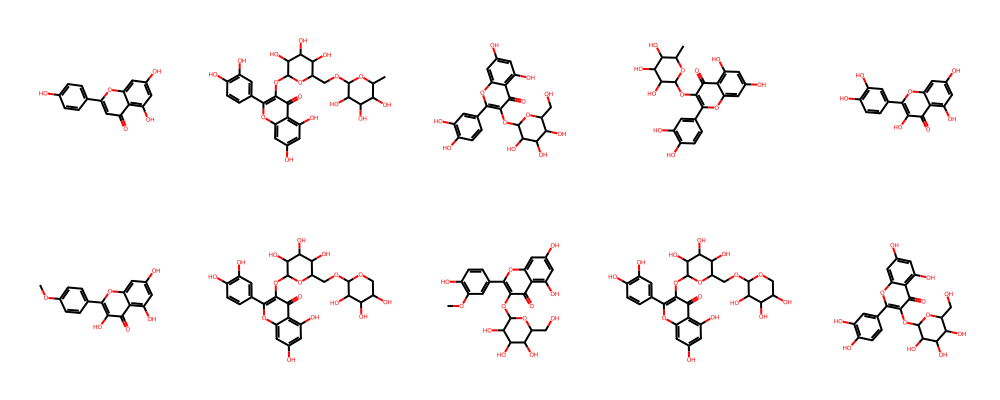

In [6]:
# prompt: in prediction_df  select smile predicted 1

# Assuming prediction_df is already created as in your provided code

# Select rows where 'prediction' is 1
smile_predicted_1 = prediction_df[prediction_df['prediction'] == 1]

# Display the selected rows
smile_predicted_1
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
# Assuming prediction_df is already created as in your provided code

# Select rows where 'prediction' is 1
smile_predicted_1 = prediction_df[prediction_df['prediction'] == 1]

# Display the selected rows
smile_predicted_1

# Assuming you want to display the first 10 SMILES with prediction 1 as images
# Check if there are at least 10 SMILES
num_smiles_to_display = min(10, len(smile_predicted_1))

# Create a list of molecules for the images
mols_to_draw = [Chem.MolFromSmiles(smi) for smi in smile_predicted_1['Smiles'].iloc[0:num_smiles_to_display]]

# Draw the molecules as a grid image
Draw.MolsToGridImage(mols_to_draw, molsPerRow=5) # Adjust molsPerRow for different grid layouts

In [7]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.4 MB/s eta 0:00:00


In [8]:
import streamlit as st
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import joblib

# Load the model
model = joblib.load('stacking_classifier.pkl')

def predict_smiles(smiles):
    """Predicts the label for a given SMILES string using the loaded model."""
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048), dtype=np.int32).reshape(1, -1)
        prediction = model.predict(fp)
        probability = model.predict_proba(fp)[0][1]  # Probability of being active
        return prediction[0], probability
    else:
        return None, None

def main():
    st.title('Phytochemical Screening App')
    st.write("This application uses a machine learning model to predict the activity of phytochemicals.")

    smiles_input = st.text_input("Enter SMILES string:", "")
    if st.button("Predict"):
        if smiles_input:
            prediction, probability = predict_smiles(smiles_input)
            if prediction is not None:
                st.success(f"Prediction: {'Active' if prediction == 1 else 'Inactive'}")
                st.write(f"Probability of being active: {probability:.4f}")
            else:
                st.error("Invalid SMILES string provided.")
        else:
            st.error("Please enter a SMILES string.")

if __name__ == "__main__":
    main()


2024-10-28 12:38:58.193 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 12:38:58.573 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-28 12:38:58.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 12:38:58.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 12:38:58.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 12:38:58.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 12:38:58.613 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-28 12:38:58.614 Thread 'MainThread': mi

In [42]:
# prompt: run the streamlit

import streamlit as st
import joblib
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# Load the model
model = joblib.load('stacking_classifier.pkl')

def predict_smiles(smiles):
    """Predicts the label for a given SMILES string using the loaded model."""
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048), dtype=np.int32).reshape(1, -1)
        prediction = model.predict(fp)
        probability = model.predict_proba(fp)[0][1]  # Probability of being active
        return prediction[0], probability
    else:
        return None, None

def main():
    st.title('Phytochemical Screening App')
    st.write("This application uses a machine learning model to predict the activity of phytochemicals.")

    smiles_input = st.text_input("Enter SMILES string:", "")
    if st.button("Predict"):
        if smiles_input:
            prediction, probability = predict_smiles(smiles_input)
            if prediction is not None:
                st.success(f"Prediction: {'Active' if prediction == 1 else 'Inactive'}")
                st.write(f"Probability of being active: {probability:.4f}")
            else:
                st.error("Invalid SMILES string provided.")
        else:
            st.error("Please enter a SMILES string.")

if __name__ == "__main__":
    main()

2024-10-27 19:32:06.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-27 19:32:06.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-27 19:32:06.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-27 19:32:06.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-27 19:32:06.991 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-27 19:32:06.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-27 19:32:06.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-27 19:32:06.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar